In [1]:
DATA_DIR = '/home/notebook/shared-ns1000k/inputs/SEAICE_M/'

FILE = 'ci.mon.mean.nc'

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def load_seaice_xarray(filepath, shift_lons=True):
    import iris, xarray
    cube = iris.load_cube(DATA_DIR + FILE)
    if shift_lons:
        cube = cube.intersection(longitude=(-180, 180))
    return xarray.DataArray.from_iris(cube)

In [55]:
xarr = load_seaice_xarray(DATA_DIR + FILE)
xarr

/opt/conda/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'ci' invalid units '(0 - 1)'
  warnings.warn(msg)


<xarray.DataArray 'ci' (time: 408, latitude: 241, longitude: 480)>
dask.array<filled, shape=(408, 241, 480), dtype=float64, chunksize=(136, 241, 240), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2012-12-01
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
Attributes:
    long_name:      Sea-ice cover
    invalid_units:  (0 - 1)
    Conventions:    CF-1.0
    history:        2013-10-08 12:17:20 GMT by mars2netcdf-0.92

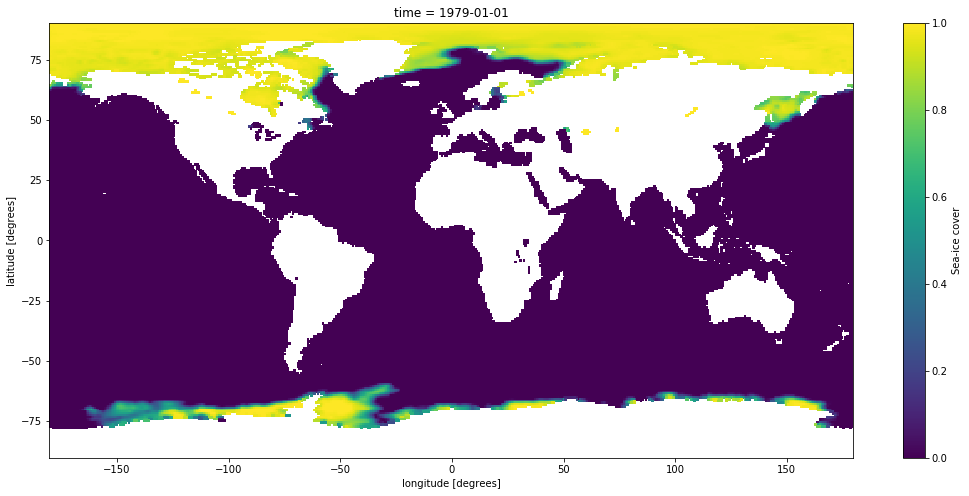

In [62]:
xarr[0].plot(figsize=(18, 8));

In [13]:
arctic_subset = xarr.sel(latitude=slice(90, 66))
sea_ice_timeseries = arctic_subset.mean(('latitude', 'longitude'))
df = sea_ice_timeseries.to_dataframe()
df # check groubpy pandas 

,ci
time,
1979-01-01,0.887362
1979-02-01,0.897902
1979-03-01,0.893445
1979-04-01,0.897780
1979-05-01,0.882448
...,...
2012-08-01,0.462465
2012-09-01,0.450493
2012-10-01,0.581409


In [27]:
import pandas as pd
df['month'] = df.index.month
mask = df.month.between(4,9)
only_summer = df[mask]
only_summer

,ci,month
time,,
1979-04-01,0.897780,4
1979-05-01,0.882448,5
1979-06-01,0.832372,6
1979-07-01,0.730873,7
1979-08-01,0.641400,8
...,...,...
2012-05-01,0.816096,5
2012-06-01,0.705867,6
2012-07-01,0.506345,7


In [47]:
summer_mean = only_summer.groupby(only_summer.index.year).mean()
summer_mean

,ci,month
time,,
1979,0.767332,6.5
1980,0.765320,6.5
1981,0.756767,6.5
1982,0.768070,6.5
1983,0.754272,6.5
1984,0.740740,6.5
1985,0.737155,6.5
1986,0.764738,6.5
1987,0.765342,6.5


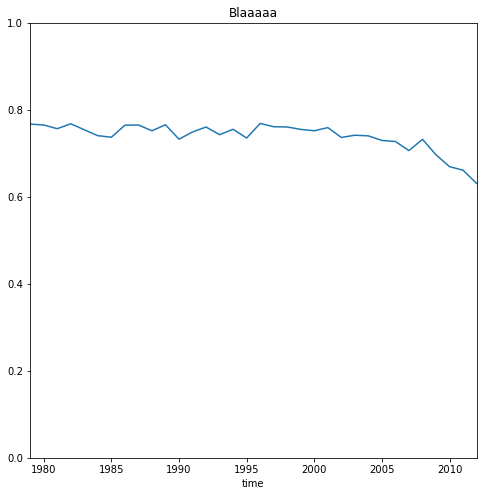

In [52]:
ax = summer_mean['ci'].plot(figsize=(8, 8), ylim=(0, 1))
ax.set_title('Blaaaaa');